In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

In [2]:
df = pd.read_csv("Instagram_data.csv",encoding="latin1")
df.head()

Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920     2586.0           1028         619.0          56   98.0   
1         5394     2727.0           1838        1174.0          78  194.0   
2         4021     2085.0           1188           0.0         533   41.0   
3         4528     2700.0            621         932.0          73  172.0   
4         2518     1704.0            255         279.0          37   96.0   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9     5.0    162              35        2   
1         7    14.0    224              48       10   
2        11     1.0    131              62       12   
3        10     7.0    213              23        8   
4         5     4.0    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learning model an...   
3  Heres how you can write a Python program to d...   
4  Plotting annotations while visualizing your da...   

                                            Hashtags  
0  #finance #money #business #investing #investme...  
1  #healthcare #health #covid #data #datascience ...  
2  #data #datascience #dataanalysis #dataanalytic...  
3  #python #pythonprogramming #pythonprojects #py...  
4  #datavisualization #datascience #data #dataana...

In [3]:
df.shape

(119, 13)

In [4]:
df.isnull().sum()

Impressions       0
From Home         1
From Hashtags     0
From Explore      2
From Other        0
Saves             1
Comments          0
Shares            2
Likes             0
Profile Visits    0
Follows           0
Caption           1
Hashtags          1
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Impressions     112 non-null    int64  
 1   From Home       112 non-null    float64
 2   From Hashtags   112 non-null    int64  
 3   From Explore    112 non-null    float64
 4   From Other      112 non-null    int64  
 5   Saves           112 non-null    float64
 6   Comments        112 non-null    int64  
 7   Shares          112 non-null    float64
 8   Likes           112 non-null    int64  
 9   Profile Visits  112 non-null    int64  
 10  Follows         112 non-null    int64  
 11  Caption         112 non-null    object 
 12  Hashtags        112 non-null    object 
dtypes: float64(4), int64(7), object(2)
memory usage: 12.2+ KB


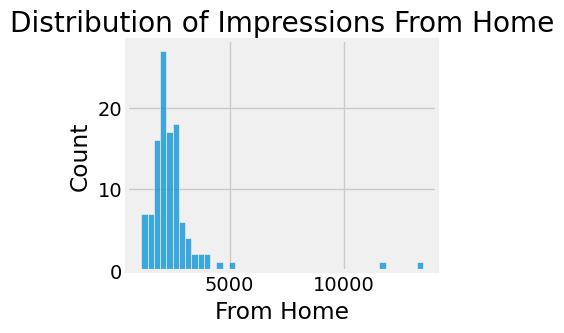

In [8]:
plt.figure(figsize=(4, 3))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
#sns.distplot(data['From Home'])
sns.histplot(df['From Home'])
plt.show()

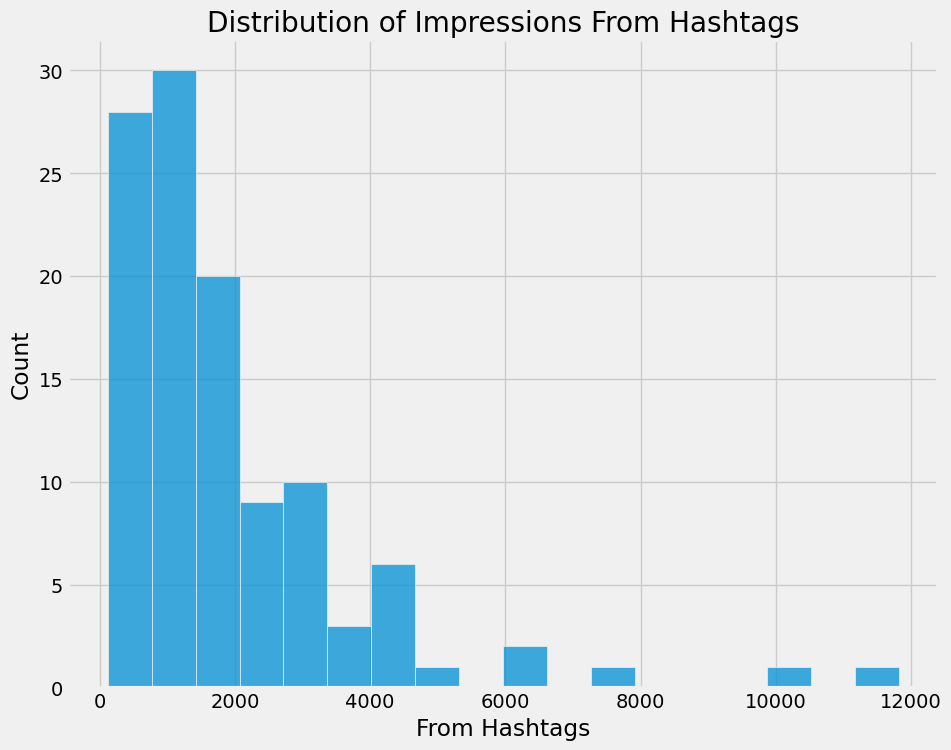

In [9]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
#sns.distplot(data['From Hashtags'])
sns.histplot(df['From Hashtags'])
plt.show()

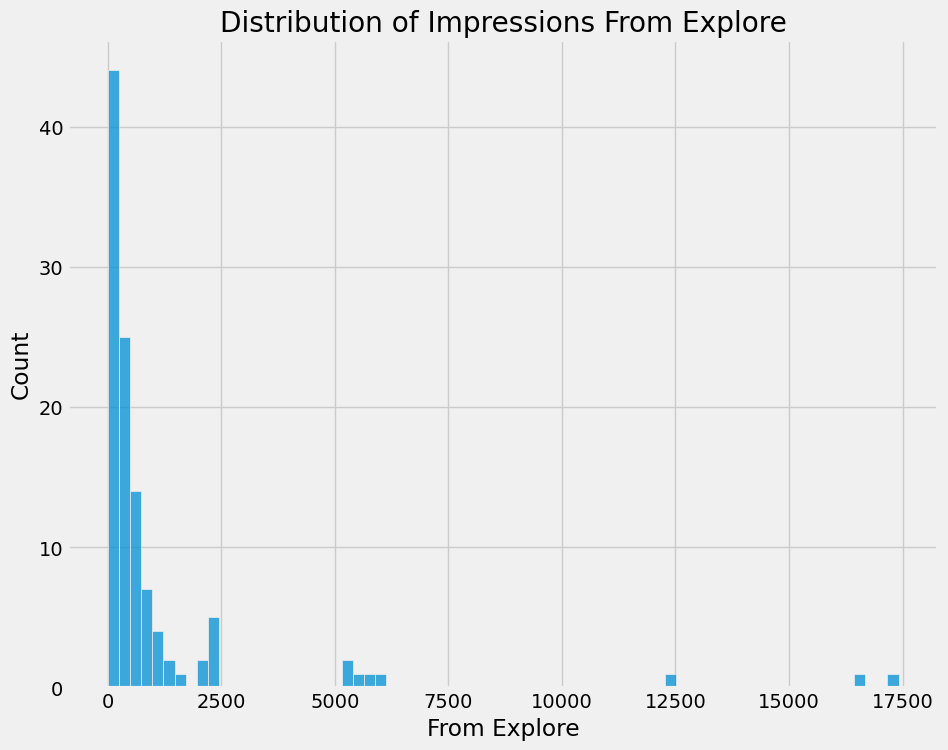

In [10]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
#sns.distplot(data['From Explore'])
sns.histplot(df['From Explore'])
plt.show()

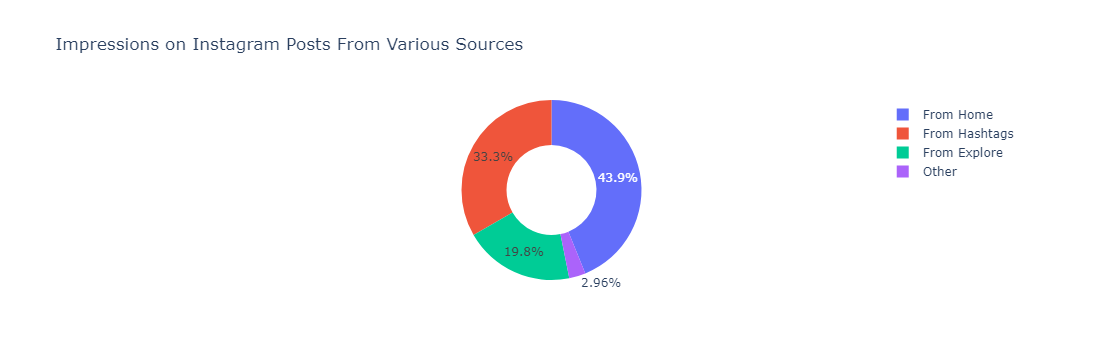

In [11]:
home = df["From Home"].sum()
hashtags = df["From Hashtags"].sum()
explore = df["From Explore"].sum()
other = df["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(df, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

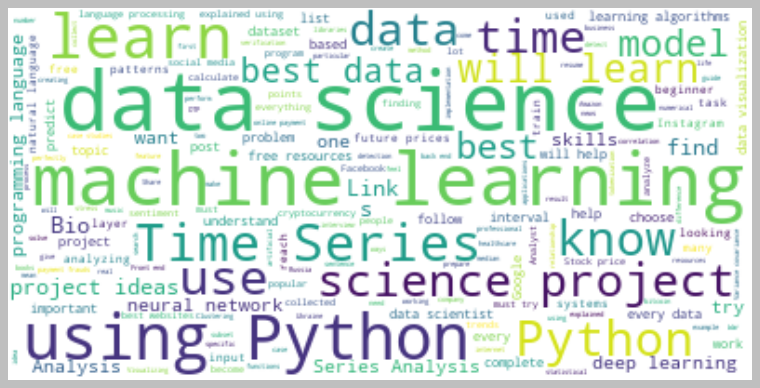

In [12]:
text = " ".join(i for i in df.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

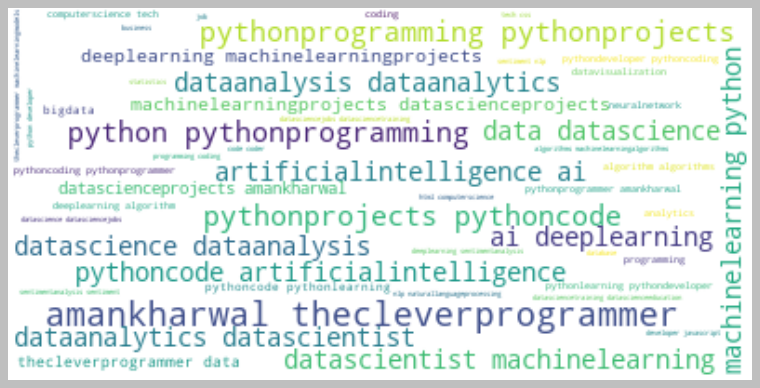

In [13]:
text = " ".join(i for i in df.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

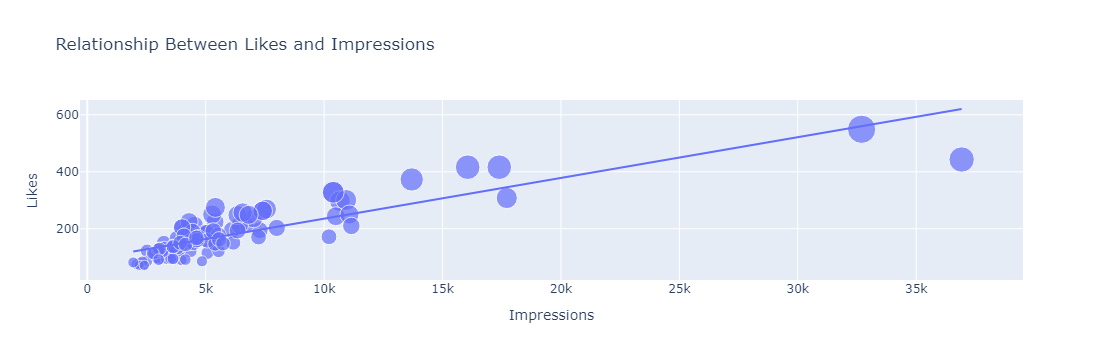

In [14]:
figure = px.scatter(data_frame = df, x="Impressions",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Impressions")
figure.show()